In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
def show_confusion_matrix(y_true, y_pred, labels, ymap=None, figsize=None):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    if figsize is None:
        width = 3*len(labels)
        hight = 2*len(labels)
        figsize=(width,hight)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm_perc, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap="Blues")

## XGBoost Classifier as classification model

In [5]:
df_train = pd.read_csv('data/sample-train-over_smote.csv')
X_train = df_train.drop('OUT', axis=1)
y_train = df_train['OUT']

df_test = pd.read_csv('data/sample-test.csv')
X_test = df_test.drop('OUT', axis=1)
y_test = df_test['OUT']

In [6]:
clf = xgb.XGBClassifier(max_depth=5, n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Richtig klassifiziert: 79.92%


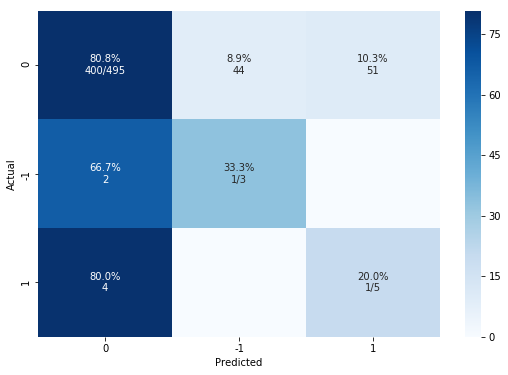

In [7]:
accurency = accuracy_score(y_test, y_pred, normalize=True) * 100
print(f'Richtig klassifiziert: {accurency:.2f}%')

show_confusion_matrix(y_test, y_pred, labels=y_test.unique())